# 실전 데이터 분석

이번 과제는 캐글의 타이타닉([Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/)) 데이터를 앞시간에서 배웠던 Python의 API들을 이용하여 분석해봅니다.

Pandas를 통한 데이터 처리, Matplotlib을 통한 EDA, Scikit-learn을 이용한 머신러닝까지 복습하시면 좋을 것 같습니다.

**필요한 모듈을 import 시킵니다.**

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### 데이터 읽어오기

**<font color='red'>Tip</font>** <br>
Dataset을 읽어올 때, 항상 Size를 함께 출려해두시면 연산 등 한눈에 파악하기 편리합니다!

In [3]:
# train.csv 파일을 읽어옵니다. 여기서 PassengerId라는 컬럼을 인덱스(index)로 지정한 뒤, train 변수에 할당합니다.
train = pd.read_csv("data/train.csv", index_col = "PassengerId")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 출력합니다.
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> 데이터를 보시면 텍스트와 숫자가 섞여 있습니다. 기계학습을 위해서는 텍스트를 숫자로 변행해주는 과정이 필요합니다. 

> 해당 과정에서 다양한 아이디어들이 필요하며, 이를 위해서 EDA와 전처리를 하게 됩니다.

> - 흔히 데이터 분석의 80% 이상을 차지하는 과정이라고 하며, 나머지가 알고리즘의 적용 및 튜닝 등이 됩니다! 

### 데이터 정리 및 기본 분석

데이터 분석 시, 해당과정을 **<u>전처리(Preprocessing)</u>**, **<u>데이터 탐색(EDA)</u>**라고 합니다

**타이타닉의 train 데이터에서 1) 전체 생존률과 2) 생존자의 총 인원수, 사망자의 총 인원수를 출력해주세요.**

1번(생존률)의 경우 약 38.3%가 나와야 하며, 2번(인원수)의 경우 생존자의 총 인원수는 342명, 사망자의 총 인원수는 549명이 나와야 합니다.

In [25]:
# 타이타닉의 train데이터에서 Survived 컬럼의 평균을 구합니다.
# 그 결과를 survived_rate라는 이름의 변수에 저장합니다.
survived_rate = train["Survived"].mean()

# survived_rate는 현재 0.0 ~ 1.0 사이의 값을 갖습니다.
# 하지만 퍼센티지(%)는 0 ~ 100.0 사이의 값을 가지므로, survived_rate에 100을 곱해줍니다.
survived_rate = survived_rate * 100

# survived_rate를 출력합니다. 결과는 38.4%가 나와야 합니다.
print(f"생존률 = {survived_rate:.1f}%".%survived_rate )

SyntaxError: invalid syntax (<ipython-input-25-e032e30f967b>, line 11)

In [4]:
# pandas의 value_counts를 활용하여 생존자의 총 인원수와 사망자의 총 인원수를 출력합니다.
# 생존자의 총 인원수(1)은 342명, 사망자의 총 인원수(0)는 549명이 나와야 합니다.
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

** Survived 컬럼에 들어가 있는 값을 쉬운 표현으로 바꿔주세요. **

Survived 컬럼에는 0(사망)이라는 값과 1(생존)이라는 값이 있습니다. 이 표현은 직관적이지 않기 때문에, 데이터 분석을 원활하게 하기 위해서는 사람이 읽기 쉬운 표현을 쓰는 것이 좋습니다.

In [5]:
# Survived 컬럼의 상위 5개의 값을 출력합니다.
# 결과값은 0과 1이 나오는데, Survived 컬럼에 대한 사전 설명(가령 0이 어떤 값을 나타내는지, 1이 어떤 값을 나타내는지)
# 을 듣지 않으면 이 값이 어떠한 의미를 가지는지 직관적으로 이해하기 어렵습니다.
train["Survived"].head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

한 가지 예로써 **Survived(humanized)**라는 새로운 컬럼을 만들겠습니다. 이 컬럼에는 0(사망), 1(생존)이 아닌, Perish(사망), Survived(생존)이라는 값이 들어가 있다면 좋겠습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Survived</th>
        <th>Survived(humanized)</th>
      </tr>
      <tr>
        <th>PassengerId</th>
        <th></th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>0</td>
        <td>Perish</td>
      </tr>
      <tr>
        <th>2</th>
        <td>1</td>
        <td>Survived</td>
      </tr>
      <tr>
        <th>3</th>
        <td>1</td>
        <td>Survived</td>
      </tr>
      <tr>
        <th>4</th>
        <td>1</td>
        <td>Survived</td>
      </tr>
      <tr>
        <th>5</th>
        <td>0</td>
        <td>Perish</td>
      </tr>
    </tbody>
  </table>

In [6]:
# 먼저 Survived 컬럼이 0인 승객을 색인합니다. 이후 Survived(humanized)라는 이름의
# 새로운 컬럼을 만들어 여기에 Perish 라는 값을 넣습니다.
train.loc[train["Survived"] == 0, "Survived(humanized)"] = "Perish"

# 비슷하게 Survived 컬럼이 1인 승객을 찾아 Survived(humanized)에 Survived라는 값을 넣습니다.
train.loc[train["Survived"] == 1, "Survived(humanized)"] = "Survived"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# Survived 컬럼과 Survived(humanized) 컬럼 두 개를 출력하여 비교합니다.
train[["Survived", "Survived(humanized)"]].head()

(891, 12)


,Survived,Survived(humanized)
PassengerId,,
1,0,Perish
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Perish


또한 이번에는 Survived 컬럼이 아닌 아닌 새롭게 만든 Survived(humanized) 컬럼으로 생존자의 총 인원수와 사망자의 총 인원수를 출력해 주세요. 앞서 사용한 ```value_counts```를 그대로 사용하면 될 것 같습니다.

In [7]:
# Write your code here!

남녀 성별에 따른 생존자 차이를 알아보고 싶다면?

Survived    0    1
Sex               
female     81  233
male      468  109


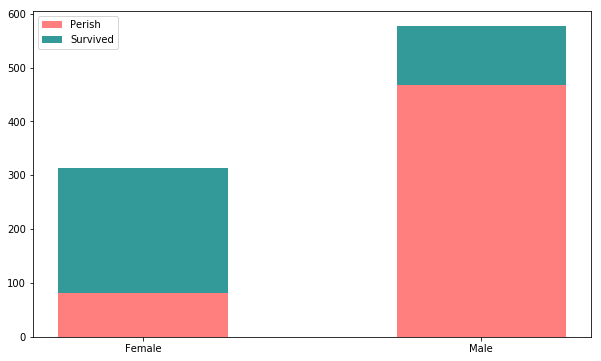

In [83]:
table = pd.pivot_table(data=train, values='Name', index='Sex', columns='Survived', aggfunc='count')
print(table)

plt.figure(figsize=(10,6))
leg = ['Perish','Survived']
# Perish
bar_1 = table[0]
# Survived
bar_2 = table[1]
# Range com a quantidade de itens das barras
x_pos = np.arange(len(bar_1))

first_bar = plt.bar(x_pos, bar_1, 0.5, color='red', alpha=.5)
second_bar = plt.bar(x_pos, bar_2, 0.5, color='teal', bottom=bar_1, alpha=.8)
# Definir position and labels for the X axis
plt.xticks(x_pos, ('Female','Male'))
plt.legend(leg)

plt.show()

** 필요하다고 생각되시면, 다른 변수들도 위의 작업과 같이 하셔도 무방합니다 **

이번에는 Embarked 컬럼으로 pivot_table을 만들어주세요. 여기에는 C(Cherbourg), S(Southampton), 그리고 Q(Queenstown) 에 탑승한 승객의 생존률이 출력됩니다. 최종적으로는 다음의 결과가 나와야 합니다.

 <table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Survived</th>
      </tr>
      <tr>
        <th>Embarked</th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>C</th>
        <td>0.553571</td>
      </tr>
      <tr>
        <th>Q</th>
        <td>0.389610</td>
      </tr>
      <tr>
        <th>S</th>
        <td>0.336957</td>
      </tr>
    </tbody>
  </table>

In [8]:
# Write your code here!

PClass 컬럼에 대해서도 pivot_table을 만들어주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
      <tr style="text-align: right;">
        <th></th>
        <th>Survived</th>
      </tr>
      <tr>
        <th>Pclass</th>
        <th></th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>3</th>
        <td>0.472826</td>
      </tr>
      <tr>
        <th>2</th>
        <td>0.242363</td>
      </tr>
      <tr>
        <th>1</th>
        <td>0.629630</td>
      </tr>
    </tbody>
  </table>

In [9]:
# Write your code here!

만약 타이타닉 데이터가 아닌 실무 데이터인데, 보고서를 위해서 시각화 자료가 필요하시다면 위에서 구하신 Pivot_table을 바로 그래프로 그릴 수 있습니다.

> Pandas에서는 시각화 기능을 포함하고 있기 때문에 단순한 시각화는 어렵지 않게 사용하실 수 있습니다.

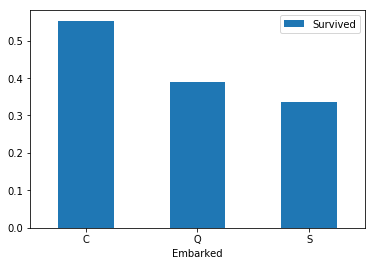

In [10]:
# 집계 테이블의 자료를 'Bar' 차트를 이용하겠다는 뜻입니다.
# rot는 option으로 x축 label의 회전과 관련이 있습니다.
train.pivot_table(index='Embarked', values='Survived').plot(kind='bar', rot=1)

이번에는 데이터 전처리 스킬 중 하나인 One Hot Encoding을 하겠습니다.

> One Hot Encoding이란 범주형 데이터를 수치로 변환해주기 위한 방법으로, N개의 범주를 N차원 벡터의 벡터로 표현하는 방법입니다.

> 해당 범주가 포함되는 자리엔 1을 넣고 나머지에는 0을 넣는다.

> 예를 들면, 사전이 [인간, 펭귄, 문어, 사람]이라면 인간을 표현하는 벡터는 [1, 0, 0, 0]이 되는 식이다. 

다양한 방법이 있을 수 있으나 저희는 Pandas에서 제공하는 method를 사용하여 해결해 보겠습니다.

In [11]:
train_embarked = pd.get_dummies(train["Embarked"], prefix = "Embarked")

print(train_embarked.shape)
train_embarked.head()

(891, 3)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


One Hot Encoding으로 변환한 값들을 원래 테이블에 합쳐줍니다. concat이라는 method를 사용하겠습니다.

> 동일한 line 수 이고 id가 섞인 작업을 수행하지 않았기 때문에 원본 데이터셋에 그냥 붙여주면 됩니다.

> 만약 id가 뒤섞이거나 line 수가 달라졌다면, merge라는 method를 사용해야 합니다.(SQL의 join을 수행하는 Pandas method입니다.)

In [12]:
train = pd.concat([train, train_embarked], axis = 1)

print(train.shape)
train.head()

(891, 15)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived(humanized),Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Perish,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Perish,0,0,1


Pclass에 대해서도 One Hot Encoding을 수행한 후, 원래의 데이터셋에 병합해주세요.

In [13]:
# Write your code here!

또 One Hot Encoding 할 수 있는 변수가 어떤 것이 있을까요? 컬럼을 살펴보시고 있다면, 추가적으로 변수를 만들어주세요.

In [14]:
# Write your code here!

이번엔 **수치형 데이터**를 한 번 살표볼까요?

**Age** 컬럼을 살펴보겠습니다. 연령대가 어떻게 분포되어 있는지 살펴보고 싶네요.

In [15]:
# 나이(Age) 컬럼에 대해 describe 함수를 사용합니다.
# 이 함수는 특정 컬럼의 평균, 분산, 최대치, 최소치와 같은 기초적인 통계치를 보여줍니다.
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

count 값이 714인 것으로 보아 <font color='red'>Missing value가 있음</font>을 짐작할 수 있겠습니다. Titanic에 탑승한 고객의 평균 나이는 29.7세(std 14.53) 입니다.

최고령자는 80세이고, 4개월 된 아이도 탑승하고 있습니다.

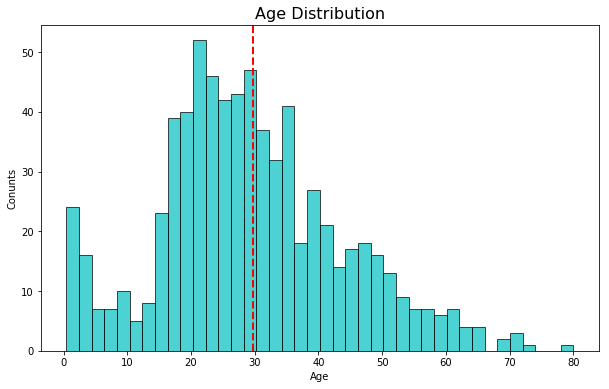

In [16]:
plt.figure(figsize=(10,6))

plt.hist(train.Age[train.Age > 0], bins=40, alpha=0.7, color='c', edgecolor='k')
plt.axvline(train.Age.mean(), color='r', linestyle='dashed', linewidth=2)

plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Conunts');

Missing value를 어떠한 값으로 채울 것인지 고민해보시고 적당한 값으로 채워주세요. 예시의 경우로 평균(Mean)값을 사용하겠습니다.

In [17]:
mean_age = train.loc[train["Age"].notnull(), "Age"].mean()
print('평균 나이: ',mean_age)

train.loc[train["Age"].isnull(), "Age"] = mean_age

평균 나이:  29.69911764705882


같은 방식으로 **Fare** 컬럼도 살펴 볼 수 있을 것 같습니다. 먼저 describe 함수를 사용해서 자료를 요약해주세요.

In [18]:
# Write your code here!

**Fare** 의 분포를 살펴 볼까요? 위의 Maplotlib 코드를 응용하시면 될 것 같습니다.

In [19]:
# Write your code here!

Missing value를 어떻게 처리하실지 결정하셨나요? 결정하셨다면 데이터셋에 적용해주세요.

In [20]:
# Write your code here!

**Age** 와 **Fare** 간의 관계가 있을까요?

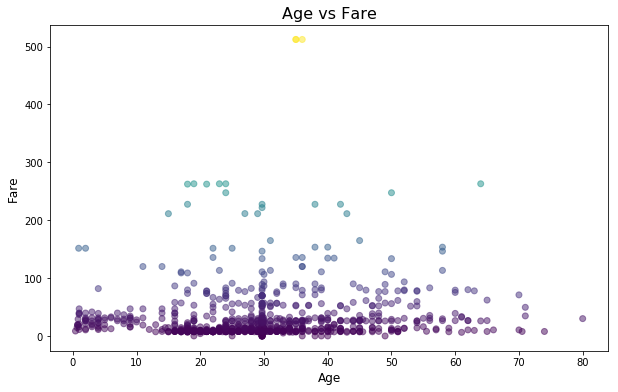

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(train['Age'], train['Fare'], alpha=0.5, c=train['Fare'])
plt.title('Age vs Fare', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.show()

** 이름(Name) 컬럼에서 호칭(Title) 분석하기. **

이름(Name) 컬럼은 얼핏 분석하기 까다로워 보이지만, 실은 간단한 패턴으로 이루어져 있습니다. 일단 ```,```과 ```.```을 기준으로

  1. ```,```의 앞에 있는 부분이 성(SurName)이며,
  2. ```,```과 ```.``` 사이에 있는 부분은 승객의 호칭(Title)입니다.
  3. 마지막으로 ```.``` 뒤에 있는 부분은 이름(FirstName) 입니다.
  
가령 ```Braund, Mr. Owen Harris``` 이라는 이름의 승객은, 1) Braund라는 성을 가진, 2) Mr라는 호칭을 가진, 3) Owen Harris 라는 이름을 가진 승객으로 해석할 수 있습니다.

사용자의 이름(Name) 컬럼에서 **호칭(Title)** 컬럼을 추출해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>Name</th>
            <th>Title</th>
            </tr>
            <tr>
            <th>PassengerId</th>
            <th></th>
            <th></th>
        </tr>
    </thead>
    <tbody>
      <tr>
        <th>1</th>
        <td>Braund, Mr. Owen Harris</td>
        <td>Mr</td>
      </tr>
      <tr>
        <th>2</th>
        <td>Cumings, Mrs. John Bradley (Florence Briggs Th...</td>
        <td>Mrs</td>
      </tr>
      <tr>
        <th>3</th>
        <td>Heikkinen, Miss. Laina</td>
        <td>Miss</td>
      </tr>
      <tr>
        <th>4</th>
        <td>Futrelle, Mrs. Jacques Heath (Lily May Peel)</td>
        <td>Mrs</td>
      </tr>
      <tr>
        <th>5</th>
        <td>Allen, Mr. William Henry</td>
        <td>Mr</td>
      </tr>
      <tr>
        <th>6</th>
        <td>Moran, Mr. James</td>
        <td>Mr</td>
      </tr>
      <tr>
        <th>7</th>
        <td>McCarthy, Mr. Timothy J</td>
        <td>Mr</td>
      </tr>
      <tr>
        <th>8</th>
        <td>Palsson, Master. Gosta Leonard</td>
        <td>Master</td>
      </tr>
      <tr>
        <th>9</th>
        <td>Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)</td>
        <td>Mrs</td>
      </tr>
      <tr>
        <th>10</th>
        <td>Nasser, Mrs. Nicholas (Adele Achem)</td>
        <td>Mrs</td>
      </tr>
    </tbody>
  </table>

In [21]:
# get_title이라는 이름의 함수를 정의합니다. 이 함수는 name이라는 변수를 인자로 받습니다.
# 이 함수는 이름을 받았을 때 이름에서 타이틀을 반환해줍니다.
# 가령 name에 "Braund, Mr. Owen Harris"가 들어오면 최종 결과는 Mr를 반환해줍니다.
def get_title(name):
    # 먼저 name을 , 을 기준으로 쪼갭니다. 쪼갠 결과는 0) Braund와 1) Mr. Owen Harris가 됩니다.
    # 여기서 1)번을 가져온 뒤 다시 . 을 기준으로 쪼갭니다. 쪼갠 결과는 0) Mr와 1) Owen Harris가 됩니다.
    # 여기서 0)번을 반환합니다. 최종적으로는 Mr를 반환하게 됩니다.
    return name.split(", ")[1].split('. ')[0]

모든 Name 컬럼 데이터에 get_title 함수를 적용한 뒤 그 결과를 Title이라는 이름의 새로운 컬럼에 대입합니다.

Pandas의 **<font color='blue'>apply</font>**라는 method를 사용하세요.

In [22]:
# Write your code here!

In [24]:
# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

(891, 15)


이름(Name) 컬럼과 호칭(Title) 컬럼만을 출력합니다.

In [25]:
# Write your code here!

※ **Cabin** 과 **Ticket** 도 추출할 수 있는 정보가 있는지 확인해 보시면 좋을 것 같습니다.

## 데이터 학습하기

다양한 기계학습 알고리즘을 담고 있는 Scikit-learn을 이용하여 Titanic의 생존자를 분류해보겠습니다.

분류(Classification) 문제를 해결하기 위한 다양한 알고리즘이 존재합니다.<br>
그 중 대표적인 의사결정나무(Decision Tree)와 랜덤포레스트(RandomForest) 알고리즘을 각각 적용해 보겠습니다.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

위 과정에서 만들어진 변수들을 활용하여 분석용 데이터셋을 만들겠습니다. 위에서 직접 만드신 변수들을 아래 feature에 추가해주세요.

In [30]:
feature_names = ['Pclass', 'Age', 'Embarked_C', 'Embarked_S', 'Embarked_Q']

In [31]:
X = train[feature_names]

print(X.shape)
X.head()

(891, 5)


,Pclass,Age,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,
1,3,22.0,0,1,0
2,1,38.0,1,0,0
3,3,26.0,0,1,0
4,1,35.0,0,1,0
5,3,35.0,0,1,0


In [33]:
y = train.Survived

len(y)

891

훈련 데이터(Train)와 검증용 데이터(Validation)로 나누겠습니다.

> **학습용 데이터(Training data):** 모형을 적합화시키기 위해서 사용되는 데이터

> **검증용 데이터(Validation data):** 모형이 얼마나 잘 적합화 되었는지 평가하고, 일부 모형들을 조정하며, 구축된 모형들 중에서 가장 좋은 모형을 선택하기 위한 목적으로 사용되는 데이터

> **평가용 데이터(Test data):** 최종 선택모형이 새로운 데이터에 대하여 얼마나 좋은 성과를 갖는지 평가하기 위해서 모형구축 및 모형 선택과정이 끝난 후에만 사용되는 데이터

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=77)

의사결정 나무 모델을 설정하는 단계입니다. 많은 옵션들을 튜닝하실 수 있습니다.

In [28]:
dt_model = DecisionTreeClassifier(max_depth = 5)
dt_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

다음 코드는 위에서 설정된 모델과 훈련용 데이터셋으로 학습시키는 코드입니다.

In [37]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

학습된 모델을 통해 예측한 후, 모델의 정확도를 구해보도록 하겠습니다.

In [39]:
from sklearn.metrics import accuracy_score

y_pred_dt = dt_model.predict(X_val)
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred_dt))

Accuracy: 0.68


그렇다면 랜덤포레스트 알고리즘으로 모델을 만들어 보도록 하겠습니다.

In [41]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


랜덤포레스트 모델을 설정하겠습니다.

In [43]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=777)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=777, verbose=0, warm_start=False)

`rf`라는 모델을 훈련용 데이터로 학습시켜 봅니다.

In [44]:
# Write your code here!

학습된 모델을 사용하여 예측값을 구하는 코드를 작성해주세요.

In [ ]:
# Write your code here!

모델이 어느정도의 성능을 가지는지 정확도를 구하는 코드를 작성해주세요.

In [ ]:
# Write your code here!

<img src="congratulations.jpg">

직접 학습시킨 결과를 Kaggle Score Board에 올려보세요! 방법은 학습된 모델과 Test data set을 이용하여 예측한 결과를 올리시면 됩니다!

<center>**고생하셨습니다. 데이터 사이언스와 한 걸음 더 가까워지셨습니다.^_^ 남은 교육도 화이팅!**</center>